In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import ngrams
from collections import Counter
import joblib



In [11]:
data = pd.read_csv('spam.csv')

In [12]:
data.columns

Index(['Category', 'Message'], dtype='object')

In [13]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
def generate_word_cloud(df,title):
  wordcloud = WordCloud(width=800, height=800, background_color='white')
  text = ' '.join(df.astype(str).tolist())
  wordcloud.generate(text)
  # Display the word cloud
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(title)
  plt.axis('off')
  plt.show()


In [7]:
spam = data.loc[data['Category'] == 'spam', 'Message']
ham = data.loc[data['Category'] == 'ham', 'Message']

In [8]:
print(spam)

2       Free entry in 2 a wkly comp to win FA Cup fina...
5       FreeMsg Hey there darling it's been 3 week's n...
8       WINNER!! As a valued network customer you have...
9       Had your mobile 11 months or more? U R entitle...
11      SIX chances to win CASH! From 100 to 20,000 po...
                              ...                        
5537    Want explicit SEX in 30 secs? Ring 02073162414...
5540    ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547    Had your contract mobile 11 Mnths? Latest Moto...
5566    REMINDER FROM O2: To get 2.50 pounds free call...
5567    This is the 2nd time we have tried 2 contact u...
Name: Message, Length: 747, dtype: object


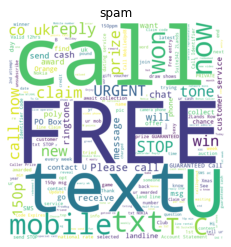

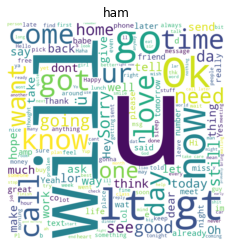

In [9]:
generate_word_cloud(spam,'spam')
generate_word_cloud(ham,'ham')

In [10]:
def generate_n_gram(df, m,n,title):

  # Define a sentence to create n-grams from
  text = ' '.join(df.astype(str).tolist())

  # Define the value of n for n-grams
  n = n

  # Create the n-grams
  n_grams = [' '.join(gram) for gram in ngrams(text.split(), n)]

  # Count the n-grams
  n_gram_counts = Counter(n_grams)

  # Define the number of top n-grams to show
  m = m

  # Get the top m most common n-grams
  top_m_n_grams = n_gram_counts.most_common(m)

  # Convert the top m n-grams and their counts into separate lists
  top_m_n_grams, top_m_counts = zip(*top_m_n_grams)

  # Create a bar chart of the top m n-grams
  plt.bar(top_m_n_grams, top_m_counts,width=0.7)

  # Set the title and axis labels
  plt.xticks(rotation=90)
  plt.title(f"Top {m} {n}-Grams for {title}")
  plt.xlabel(f"{n}-Grams")
  plt.ylabel("Frequency")

  # Display the bar chart
  plt.show()


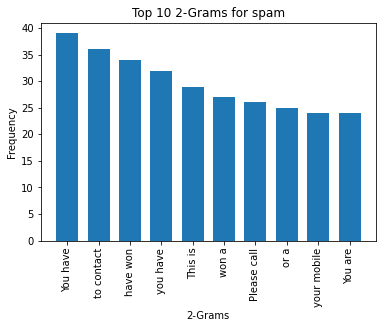

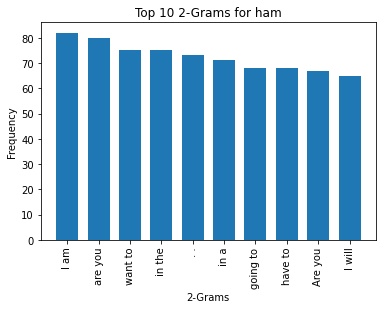

In [11]:
generate_n_gram(spam,10,2,'spam')
generate_n_gram(ham,10,2,'ham')

# TRAIN TEST SPLIT

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = data.drop(["Category"], axis=1) 
y = data.drop(["Message"], axis=1) 

In [17]:
x= X.to_numpy()
y= y.to_numpy()

In [6]:
temp = x[1]
print(type(temp.astype(str)))

<class 'numpy.ndarray'>


In [18]:
x_train,x_test, y_train, y_test = train_test_split(x, y, train_size = .75)

In [19]:
def remove_null(datas,labels):
    not_null_idx = [i for i,o in enumerate(datas) if o is not None]
    return np.array(datas)[not_null_idx],np.array(labels)[not_null_idx]

In [20]:
x_train,y_train = remove_null(x_train,y_train)
x_test,y_test = remove_null(x_test,y_test)

# Pre-Processing Data

In [21]:
import re
import string
from nltk.tokenize import word_tokenize


In [22]:
def remove_hyperlink(word):
    word = str(word)
    return  re.sub(r"http\S+", "", word)


In [23]:
def to_lower(word):
    result = word.lower()
    return result


In [24]:
def remove_number(word):
    word = str(word)
    result = re.sub(r'\d+', '', word)
    return result


In [25]:
def remove_punctuation(word):
    result = word.translate(str.maketrans(dict.fromkeys(string.punctuation)))
    return result


In [26]:
def remove_whitespace(word):
    result = word.strip()
    return result


In [27]:
def replace_newline(word):
    return word.replace('\n','')


In [28]:
def clean_up_pipeline(sentence):
    cleaning_utils = [remove_hyperlink,
                      replace_newline,
                      to_lower,
                      remove_number,
                      remove_punctuation,remove_whitespace]
    for o in cleaning_utils:
        sentence = o(sentence)
    return sentence

In [29]:
x_train = [clean_up_pipeline(o) for o in x_train]
x_test = [clean_up_pipeline(o) for o in x_test]

In [30]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [31]:
 import nltk
 nltk.download('punkt')
 nltk.download('stopwords')
 nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bisht\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bisht\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bisht\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [32]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [33]:
x_train = [word_tokenize(o) for o in  x_train]
x_test  = [word_tokenize(o) for o in  x_test]

In [34]:
def remove_stop_words(words):
    result = [i for i in words if i not in stopwords.words()]
    return result

In [35]:
def word_stemmer(words):
    return [stemmer.stem(o) for o in words]

In [36]:
def word_lemmatizer(words):
    return [lemmatizer.lemmatize(o) for o in words]

In [37]:
def clean_token_pipeline(words):
    cleaning_utils = [remove_stop_words,word_lemmatizer]
    for o in cleaning_utils:
        words = o(words)
    return words

In [38]:
x_train = [clean_token_pipeline(o) for o in x_train]
x_test = [clean_token_pipeline(o) for o in x_test]

In [39]:
x_train = [" ".join(o) for o in x_train]
x_test = [" ".join(o) for o in x_test]

In [40]:
x_train_copy = x_train
x_test_copy = x_test

# Feature Extraction

## TfidVectorizer

In [41]:
x_train = [o.split(" ") for o in x_train]
x_test = [o.split(" ") for o in x_test]

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
vectorizer = TfidfVectorizer()
raw_sentences = [' '.join(o) for o in x_train]
vectorizer.fit(raw_sentences)

TfidfVectorizer()

In [42]:

def convert_to_feature(raw_tokenize_data):
    raw_sentences = [' '.join(o) for o in raw_tokenize_data]
    return vectorizer.transform(raw_sentences)

In [34]:
vectorizer = TfidfVectorizer()
raw_sentences = [' '.join(o) for o in x_train]
vectorizer.fit(raw_sentences)

TfidfVectorizer()

In [48]:
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']

## CountVectorizer

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
vectorizer = CountVectorizer()
raw_sentences = [' '.join(o) for o in x_train]
vectorizer.fit(raw_sentences)

CountVectorizer()

In [45]:
x_train_features = convert_to_feature(x_train)
x_test_features = convert_to_feature(x_test)

# Training Classifier

## Gausian NB

In [47]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [48]:
clf_gnb = GaussianNB()

In [49]:
clf_gnb.fit(x_train_features.toarray(),y_train)

C:\Users\bisht\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [50]:
clf_gnb.score(x_test_features.toarray(),y_test)

0.8133524766690596

In [51]:
clf_gnb.score(x_train_features.toarray(),y_train)

0.9105049054797798

## Multinomial NB

In [49]:
from sklearn.naive_bayes import MultinomialNB
clf_mb = MultinomialNB()

In [50]:
clf_mb.fit(x_train_features.toarray(),y_train)

c:\Users\bisht\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [51]:
clf_mb.score(x_test_features.toarray(),y_test)

0.9755922469490309

In [52]:
clf_mb.score(x_train_features.toarray(),y_train)

0.988992581957406

## Error Analysis

### Gaussian NB

In [56]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix,f1_score, precision_score,recall_score

In [57]:
y_predict = clf_mb.predict(x_test_features.toarray())

In [58]:
confusion_matrix(y_test,y_predict)

array([[1194,   18],
       [  20,  161]], dtype=int64)

### Plot confusion matrix

In [59]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

In [60]:
cnf_matrix = confusion_matrix(y_test,y_predict)

In [61]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Confusion matrix, without normalization
[[1194   18]
 [  20  161]]


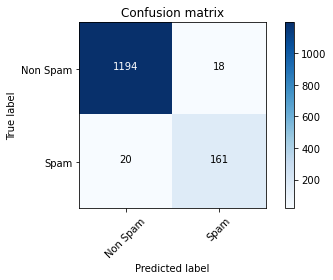

In [62]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non Spam','Spam'], normalize=False,
                      title='Confusion matrix')

Confusion matrix, without normalization
[[1194   18]
 [  20  161]]


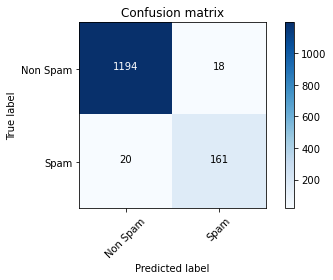

In [63]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non Spam','Spam'], normalize=False,
                      title='Confusion matrix')

In [64]:
import pickle
f = open('clf_mb.pickle', 'wb')
pickle.dump(clf_mb, f)
f.close()

In [2]:
import streamlit as st
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
import numpy as np
st.header("Spam Prediction App")
st.text_input("Enter your Name: ", key="name")
data = pd.read_csv("spam.csv")

2023-04-10 20:50:10.586 
  command:

    streamlit run c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


range(0, 20)


In [3]:
clf_mb = MultinomialNB()

In [4]:
import pickle
f = open('clf_mb.pickle', 'rb')
clf_mb = pickle.load(f)
f.close()

In [57]:
def data_prep(x_test):
    x_test  = [word_tokenize(o) for o in  x_test]
    x_test = [clean_token_pipeline(o) for o in x_test]
    x_test = [" ".join(o) for o in x_test]
    x_test = [o.split(" ") for o in x_test]
    print(x_test)
    vectorizer = TfidfVectorizer()
    raw_sentences = [' '.join(o) for o in x_test]
    vectorizer.fit(raw_sentences)
    
    def convert_to_feature(raw_tokenize_data):
        raw_sentences = [' '.join(o) for o in raw_tokenize_data]
        return vectorizer.transform(raw_sentences)
        
    vectorizer = CountVectorizer()
    raw_sentences = [' '.join(o) for o in x_test]
    vectorizer.fit(raw_sentences)
    x_test_features = convert_to_feature(x_test)
    
    return x_test_features

In [58]:
input_text = input()
input_text = (f"{input_text}",)
input_text = data_prep(input_text)

[['FreeMsg', 'Hey', 'darling', "'s", '3', 'week', "'s", 'word', 'back', '!', 'I', "'d", 'fun', '?', 'Tb', '!', 'XxX', 'std', 'chgs', 'send', ',', 'Â£1.50', 'rcv']]


# Deploying the model

In [69]:
%pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [36]:
import joblib

In [53]:
# Save the model
joblib.dump(clf_mb, 'spam_classifier.pkl')

['spam_classifier.pkl']

In [1]:
!pip freeze > requirements.txt